- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
 - [Dimension reduction](#Dimension-reduction)
- [Task B - Predictive Model](#Task-B---Predictive-Model)


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

In [3]:
# Banknotes dataset

df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

In [4]:
# Nursery dataset

df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

In [5]:
# Banknotes dataset

df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [6]:
# Nursery dataset

df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

In [7]:
# Nursery dataset

# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# Nursery dataset

# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# Nursery dataset

# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

In [10]:
# Nursery dataset

# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
# Nursery dataset

class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# Nursery dataset

# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# Nursery dataset

# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [15]:
# Banknotes dataset

# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

In [16]:
# Nursery dataset

# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features
### 1. Model Based Ranking
We can fit a classifier to each feature and rank the predictive power. This method selects the most powerful features individually but ignores the predictive power when features are combined.

Random Forest Classifier is used in this case because it is robust, nonlinear, and doesn't require scaling.



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = df_bankNotes['class']

X = df_bankNotes.drop('class', axis = 1)
y = data

clf = RandomForestClassifier(n_estimators = 50, max_depth = 4)

scores = []
num_features = len(X.columns)
for i in range(num_features):
    col = X.columns[i]
    score = np.mean(cross_val_score(clf, X[col].values.reshape(-1,1), y, cv=10))
    scores.append((int(score*100), col))

print(sorted(scores, reverse = True))

[(84, 'variance of Wavelet Transformed image'), (76, 'skewness of Wavelet Transformed image'), (68, 'curtosis of Wavelet Transformed image'), (56, 'entropy of image')]


#### 2. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** if there are negative values
##### 2.1 Mutual Info Classif

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test.fit(X, y)


SelectKBest(k=2, score_func=<function mutual_info_classif at 0x0AABE8A0>)

In [19]:
scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.37790102674274917, 'variance of Wavelet Transformed image'), (0.22635598694992187, 'skewness of Wavelet Transformed image'), (0.12341179695350535, 'curtosis of Wavelet Transformed image'), (0.015988361435625986, 'entropy of image')]


## Dimension reduction

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_bankNotes[['class']]], axis = 1)
#finalDf

In [21]:
import matplotlib.pyplot as plt
targets = ['0', '1']
color = ['r', 'g']

targets = ['0', '1']
print(type(int(targets[0])))

finalDf.dtypes

#for target, color in zip(targets,colors):
    #indicesToKeep = finalDf['class'] == target
    #plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
     #          , finalDf.loc[indicesToKeep, 'principal component 2']
      #         , c = color
       #        , s = 50)

<class 'int'>


principal component 1    float64
principal component 2    float64
class                      int64
dtype: object

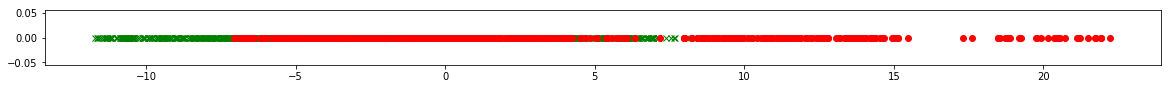

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,1))

for i in range(0,len(finalDf)):
    if finalDf.iloc[i]['class'] == 0:
        plt.plot(finalDf.iloc[i]['principal component 1'],0,'x',c = 'g')
    else:
        plt.plot(finalDf.iloc[i]['principal component 1'],0,'o',c = 'r')
plt.show()

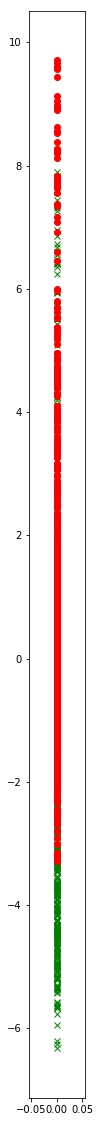

In [23]:
plt.figure(figsize = (1,20))

for i in range(0,len(finalDf)):
    if finalDf.iloc[i]['class'] == 0:
        plt.plot(0,finalDf.iloc[i]['principal component 2'],'x',c = 'g')
    else:
        plt.plot(0,finalDf.iloc[i]['principal component 2'],'o',c = 'r')
plt.show()

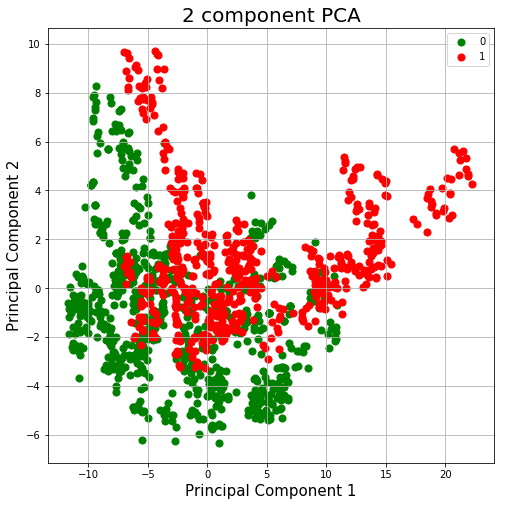

In [24]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == int(target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Task B - Predictive Model

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(2)]).T
    
    Z = classifier.predict(Xpred)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP

In [26]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


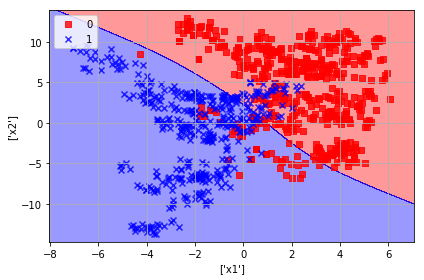

In [28]:
# Banknotes dataset

mlp.fit(X_train1.values,y_train1.values)
plot_decision_regions(X_train1.values, y_train1.values, classifier=mlp)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

the weights are 
 [array([[-0.46064129, -0.17586096, -0.32131842, -0.53258191,  0.06228639,
         0.70861834,  0.05623854, -0.42888831,  0.57487186,  0.74673048],
       [-0.42483416, -0.2571271 , -0.07123004, -0.4736511 , -0.27105654,
         0.10023083,  0.57229915, -0.34932817,  0.08789763,  0.05216161],
       [ 0.6150889 , -0.54788698, -0.56273906, -0.49231196, -0.7047999 ,
         0.05799144, -0.57575286, -0.28278033,  0.04315847,  0.24655664],
       [ 0.31138972,  0.26667262,  0.3679785 , -0.07110701, -0.33557544,
        -0.30334021, -0.33720797, -0.21325477, -0.42052047,  0.04784754]]), array([[-0.3614863 ,  0.36550121, -0.15361878,  0.44614871,  0.11925953],
       [ 0.61670749, -0.05632267,  0.82740539,  0.01890484,  0.92415039],
       [-0.34376572, -0.34639183,  0.10534619,  0.28569105, -0.3967125 ],
       [ 0.79679116, -0.46908191,  0.00719766,  0.95903287,  0.43624246],
       [ 0.39235553, -0.05476736, -0.05845618,  0.60308763,  0.3047302 ],
       [-0.5492723 , 

### SVM

In [30]:
from sklearn.svm import SVC

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


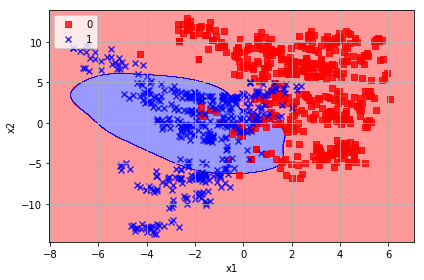

In [31]:
# Banknotes dataset

svm=svm.fit(X_train1.values, y_train1.values)
plot_decision_regions(X_train1.values, y_train1.values, classifier=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

dual coef 
 [[-1.24854962e-01 -2.87161209e-01 -6.54310282e-02 -4.33004523e-01
  -3.45358520e-01 -3.24666355e-03 -2.78294497e-01 -2.09035233e-01
  -4.06931797e-01 -3.41561664e-01 -1.59682732e-01 -2.24980521e-01
  -1.64918385e-01 -3.73104694e-01 -9.50990304e-02 -3.19072877e-02
  -2.21230487e-01 -2.33509739e-02 -1.89951945e-01 -7.33863792e-01
  -6.36074559e-02 -3.06192506e-01 -2.98481492e-02 -1.00000000e+00
  -6.60649280e-01 -6.46108197e-01 -4.25627328e-01 -1.21006407e-01
  -3.47423939e-02 -7.55253636e-02 -3.49129649e-01 -3.02036009e-01
  -8.20649665e-01 -3.89884994e-02 -3.41091565e-02 -5.75817903e-01
  -6.00005634e-01 -3.19982313e-01 -3.33897726e-01 -4.73607257e-01
  -1.98738139e-02 -1.57993851e-01 -4.16808967e-01 -4.72767976e-01
  -1.14270420e-01 -1.37378465e-01 -8.17541214e-02 -4.17950139e-02
  -1.09961969e-01 -1.79719197e-01 -2.79946058e-01 -5.43652190e-01
  -4.75227158e-01 -8.92418251e-01 -3.77504171e-01 -2.43029219e-01
  -3.66324464e-01 -3.42698687e-01 -1.35903794e-01 -1.63592492e-0